In [1]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Loading data
df_assessments = pd.read_csv('assessments.csv')
df_courses = pd.read_csv('courses.csv')
df_studentAssessment = pd.read_csv('studentAssessment.csv')
df_studentInfo = pd.read_csv('studentInfo.csv')
df_studentRegistration = pd.read_csv('studentRegistration.csv')
df_studentVle = pd.read_csv('studentVle.csv')
df_vle = pd.read_csv('vle.csv')

In [3]:
new_df = df_studentInfo.dropna()[['code_module', 'id_student', 'code_presentation', 'final_result']].drop_duplicates()
new_df = new_df[(new_df['final_result']=='Distinction') | (new_df['final_result']=='Pass') | (new_df['final_result']=='Fail')]
new_df

,code_module,id_student,code_presentation,final_result
0,AAA,11391,2013J,Pass
1,AAA,28400,2013J,Pass
3,AAA,31604,2013J,Pass
4,AAA,32885,2013J,Pass
5,AAA,38053,2013J,Pass
...,...,...,...,...
32587,GGG,2620947,2014J,Distinction
32588,GGG,2640965,2014J,Fail
32589,GGG,2645731,2014J,Distinction
32590,GGG,2648187,2014J,Pass


In [4]:
print("Postotak ucenika koji su prosli")
print(len(new_df[(new_df['final_result'] == 'Pass') | (new_df['final_result'] == 'Distinction')])/len(new_df))
print("Postotak ucenika koji nisu prosli")
print(len(new_df[new_df['final_result'] == 'Fail'])/len(new_df))

0.6796679343289119
0.320332065671088


# Student Info

In [84]:
df_studentInfo_new = df_studentInfo.merge(new_df, how='inner', right_on=['code_module', 'code_presentation', 'id_student', 'final_result'], left_on=['code_module', 'code_presentation', 'id_student', 'final_result'])
df_studentInfo_new['final_result'].replace({'Distinction':'Pass'}, inplace=True)
df_studentInfo_new = pd.get_dummies(df_studentInfo_new, columns=['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability'])
df_studentInfo_new

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,final_result,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,AAA,2013J,11391,0,240,Pass,0,1,1,0,...,0,0,0,0,1,0,0,1,1,0
1,AAA,2013J,28400,0,60,Pass,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,AAA,2013J,31604,0,60,Pass,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,AAA,2013J,32885,0,60,Pass,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,AAA,2013J,38053,0,60,Pass,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21557,GGG,2014J,2620947,0,30,Pass,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
21558,GGG,2014J,2640965,0,30,Fail,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
21559,GGG,2014J,2645731,0,30,Pass,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
21560,GGG,2014J,2648187,0,30,Pass,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# Daily Activity

In [8]:
np_values = new_df.values
np_daily = []
for i in range(len(np_values)):
    for j in range(245):
        np_daily.append([np_values[i][0], np_values[i][1], np_values[i][2], j])
np_daily

[['AAA', 11391, '2013J', 0],
 ['AAA', 11391, '2013J', 1],
 ['AAA', 11391, '2013J', 2],
 ['AAA', 11391, '2013J', 3],
 ['AAA', 11391, '2013J', 4],
 ['AAA', 11391, '2013J', 5],
 ['AAA', 11391, '2013J', 6],
 ['AAA', 11391, '2013J', 7],
 ['AAA', 11391, '2013J', 8],
 ['AAA', 11391, '2013J', 9],
 ['AAA', 11391, '2013J', 10],
 ['AAA', 11391, '2013J', 11],
 ['AAA', 11391, '2013J', 12],
 ['AAA', 11391, '2013J', 13],
 ['AAA', 11391, '2013J', 14],
 ['AAA', 11391, '2013J', 15],
 ['AAA', 11391, '2013J', 16],
 ['AAA', 11391, '2013J', 17],
 ['AAA', 11391, '2013J', 18],
 ['AAA', 11391, '2013J', 19],
 ['AAA', 11391, '2013J', 20],
 ['AAA', 11391, '2013J', 21],
 ['AAA', 11391, '2013J', 22],
 ['AAA', 11391, '2013J', 23],
 ['AAA', 11391, '2013J', 24],
 ['AAA', 11391, '2013J', 25],
 ['AAA', 11391, '2013J', 26],
 ['AAA', 11391, '2013J', 27],
 ['AAA', 11391, '2013J', 28],
 ['AAA', 11391, '2013J', 29],
 ['AAA', 11391, '2013J', 30],
 ['AAA', 11391, '2013J', 31],
 ['AAA', 11391, '2013J', 32],
 ['AAA', 11391, '201

In [138]:
df_daily = pd.DataFrame(np_daily)
df_daily = df_daily.rename(columns={0:'code_module', 1:'id_student', 2:'code_presentation', 3:'date'})
df_daily

,code_module,id_student,code_presentation,date
0,AAA,11391,2013J,0
1,AAA,11391,2013J,1
2,AAA,11391,2013J,2
3,AAA,11391,2013J,3
4,AAA,11391,2013J,4
...,...,...,...,...
5282685,GGG,2684003,2014J,240
5282686,GGG,2684003,2014J,241
5282687,GGG,2684003,2014J,242
5282688,GGG,2684003,2014J,243


In [10]:
df_counts = df_studentVle[['code_module', 'id_student', 'code_presentation', 'date', 'sum_click']].groupby(['code_module', 'id_student', 'code_presentation', 'date']).sum()
df_counts = df_counts.reset_index(level=['code_module', 'id_student', 'code_presentation', 'date'])
df_counts

,code_module,id_student,code_presentation,date,sum_click
0,AAA,6516,2014J,-23,28
1,AAA,6516,2014J,-22,82
2,AAA,6516,2014J,-20,41
3,AAA,6516,2014J,-17,7
4,AAA,6516,2014J,-12,2
...,...,...,...,...,...
1808114,GGG,2695362,2014B,201,40
1808115,GGG,2695362,2014B,210,9
1808116,GGG,2695362,2014B,212,6
1808117,GGG,2695362,2014B,220,35


In [139]:
df_daily = df_daily.merge(df_counts, how='left', left_on=['code_module', 'id_student', 'code_presentation', 'date'], right_on=['code_module', 'id_student', 'code_presentation', 'date'])
df_daily = df_daily.fillna(0)
df_daily

,code_module,id_student,code_presentation,date,sum_click
0,AAA,11391,2013J,0,49.0
1,AAA,11391,2013J,1,127.0
2,AAA,11391,2013J,2,4.0
3,AAA,11391,2013J,3,0.0
4,AAA,11391,2013J,4,0.0
...,...,...,...,...,...
5282685,GGG,2684003,2014J,240,0.0
5282686,GGG,2684003,2014J,241,0.0
5282687,GGG,2684003,2014J,242,0.0
5282688,GGG,2684003,2014J,243,0.0


In [12]:
def label_activity(row):
    if row['sum_click'] > 0:
        return 1
    else:
        return 0

In [140]:
df_daily['active'] = df_daily.apply(lambda row: label_activity(row), axis=1)
df_daily

,code_module,id_student,code_presentation,date,sum_click,active
0,AAA,11391,2013J,0,49.0,1
1,AAA,11391,2013J,1,127.0,1
2,AAA,11391,2013J,2,4.0,1
3,AAA,11391,2013J,3,0.0,0
4,AAA,11391,2013J,4,0.0,0
...,...,...,...,...,...,...
5282685,GGG,2684003,2014J,240,0.0,0
5282686,GGG,2684003,2014J,241,0.0,0
5282687,GGG,2684003,2014J,242,0.0,0
5282688,GGG,2684003,2014J,243,0.0,0


In [143]:
clicks_per_day = df_daily[['date', 'sum_click', 'active']].groupby('date').sum().reset_index()
clicks_per_day

,date,sum_click,active
0,0,202953.0,7079
1,1,224346.0,7539
2,2,286283.0,9631
3,3,249263.0,9077
4,4,227894.0,8619
...,...,...,...
240,240,136330.0,4468
241,241,96119.0,3589
242,242,29279.0,2307
243,243,20451.0,1783


Clicks per Day


(-0.5, 244.5, 0.0, 336564.9)

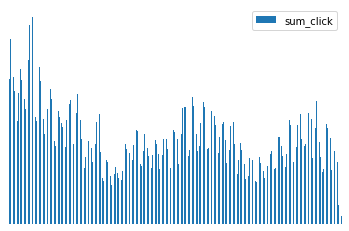

In [150]:
print("Clicks per Day")
clicks_per_day.plot.bar(x='date', y='sum_click')
plt.axis('off')

Interactions per Day


(-0.5, 244.5, 0.0, 11048.1)

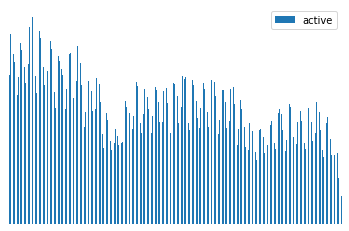

In [151]:
print("Interactions per Day")
clicks_per_day.plot.bar(x='date', y='active')
plt.axis('off')

In [152]:
max_clicks = max(df_daily['sum_click'])
df_daily['normalized'] = df_daily['sum_click']/max_clicks
df_daily = df_daily.groupby(['code_module', 'id_student', 'code_presentation']).apply(lambda x:[list(x['active']), list(x['normalized']),list(x['sum_click'])]).apply(pd.Series).reset_index()
df_daily = df_daily.merge(new_df, how='inner', left_on=['code_module', 'id_student', 'code_presentation'], right_on=['code_module', 'id_student', 'code_presentation'])
df_daily['final_result'].replace({'Pass':1, 'Fail':0, 'Distinction':1}, inplace=True)
df_daily

,code_module,id_student,code_presentation,0,1,2,final_result
0,AAA,6516,2014J,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, ...","[0.010160274756725816, 0.006439610761305095, 0...","[71.0, 45.0, 60.0, 17.0, 0.0, 23.0, 13.0, 0.0,...",1
1,AAA,11391,2013J,"[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.0070120206067544365, 0.0181740125930166, 0....","[49.0, 127.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0....",1
2,AAA,24734,2014J,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.001001717229536348, 0.0, 0.0, 0.0...","[0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,AAA,26192,2014J,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.0, 0.008586147681740127, 0.0040068689181453...","[0.0, 60.0, 28.0, 59.0, 12.0, 16.0, 0.0, 0.0, ...",1
4,AAA,28061,2014J,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[0.0, 0.0008586147681740126, 0.0, 0.0, 0.0, 0....","[0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0,...",1
...,...,...,...,...,...,...,...
21557,GGG,2679694,2013J,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.001001717229536348, 0.0...","[0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, ...",0
21558,GGG,2682002,2014B,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
21559,GGG,2684003,2014J,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...","[0.0, 0.0, 0.0021465369204350317, 0.0014310246...","[0.0, 0.0, 15.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0...",1
21560,GGG,2689480,2014B,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0005724098454493417, 0.0028620492...","[0.0, 0.0, 4.0, 20.0, 31.0, 5.0, 0.0, 0.0, 0.0...",1


# Combined

In [89]:
df_combined = df_daily.merge(df_studentInfo_new, how='inner', left_on=['code_module', 'id_student', 'code_presentation'], right_on=['code_module', 'id_student', 'code_presentation'])
df_combined

,code_module,id_student,code_presentation,active,normalized,sum_click,final_result_x,num_of_prev_attempts,studied_credits,final_result_y,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,AAA,6516,2014J,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, ...","[0.010160274756725816, 0.006439610761305095, 0...","[71.0, 45.0, 60.0, 17.0, 0.0, 23.0, 13.0, 0.0,...",1,0,60,Pass,...,0,0,0,1,0,0,0,1,1,0
1,AAA,11391,2013J,"[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.0070120206067544365, 0.0181740125930166, 0....","[49.0, 127.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0....",1,0,240,Pass,...,0,0,0,0,1,0,0,1,1,0
2,AAA,24734,2014J,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.001001717229536348, 0.0, 0.0, 0.0...","[0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,60,Pass,...,0,1,0,0,0,1,0,0,1,0
3,AAA,26192,2014J,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.0, 0.008586147681740127, 0.0040068689181453...","[0.0, 60.0, 28.0, 59.0, 12.0, 16.0, 0.0, 0.0, ...",1,0,60,Pass,...,0,1,0,0,0,0,1,0,1,0
4,AAA,28061,2014J,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[0.0, 0.0008586147681740126, 0.0, 0.0, 0.0, 0....","[0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0,...",1,0,60,Pass,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21557,GGG,2679694,2013J,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.001001717229536348, 0.0...","[0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,30,Fail,...,0,0,0,0,0,0,1,0,1,0
21558,GGG,2682002,2014B,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,30,Pass,...,0,0,0,1,0,0,1,0,1,0
21559,GGG,2684003,2014J,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...","[0.0, 0.0, 0.0021465369204350317, 0.0014310246...","[0.0, 0.0, 15.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0...",1,0,30,Pass,...,1,0,0,0,0,0,1,0,1,0
21560,GGG,2689480,2014B,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0005724098454493417, 0.0028620492...","[0.0, 0.0, 4.0, 20.0, 31.0, 5.0, 0.0, 0.0, 0.0...",1,0,30,Pass,...,0,0,0,0,0,0,1,0,1,0


In [90]:
list(df_combined)

['code_module',
 'id_student',
 'code_presentation',
 'active',
 'normalized',
 'sum_click',
 'final_result_x',
 'num_of_prev_attempts',
 'studied_credits',
 'final_result_y',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'imd_band_0-10%',
 'imd_band_10-20',
 'imd_band_20-30%',
 'imd_band_30-40%',
 'imd_band_40-50%',
 'imd_band_50-60%',
 'imd_band_60-70%',
 'imd_band_70-80%',
 'imd_band_80-90%',
 'imd_band_90-100%',
 'age_band_0-35',
 'age_band_35-55',
 'age_ba

# Model

In [15]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [25]:
list(df_studentInfo_new)

['code_module',
 'code_presentation',
 'id_student',
 'num_of_prev_attempts',
 'studied_credits',
 'final_result',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'imd_band_0-10%',
 'imd_band_10-20',
 'imd_band_20-30%',
 'imd_band_30-40%',
 'imd_band_40-50%',
 'imd_band_50-60%',
 'imd_band_60-70%',
 'imd_band_70-80%',
 'imd_band_80-90%',
 'imd_band_90-100%',
 'age_band_0-35',
 'age_band_35-55',
 'age_band_55<=',
 'disability_N',
 'disability_Y']

In [39]:
studentInfo_y = df_studentInfo_new['final_result'].replace({'Pass':1, 'Fail':0})
studentInfo_X = df_studentInfo_new[[
 'num_of_prev_attempts',
 'studied_credits',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'imd_band_0-10%',
 'imd_band_10-20',
 'imd_band_20-30%',
 'imd_band_30-40%',
 'imd_band_40-50%',
 'imd_band_50-60%',
 'imd_band_60-70%',
 'imd_band_70-80%',
 'imd_band_80-90%',
 'imd_band_90-100%',
 'age_band_0-35',
 'age_band_35-55',
 'age_band_55<=',
 'disability_N',
 'disability_Y']].values

info_DTC = []
info_RTC = []
info_LR = []
info_SVM = []
kf = KFold(n_splits=5)
kf.get_n_splits(studentInfo_X)
for train_index, test_index in kf.split(studentInfo_X):
    clf1 = tree.DecisionTreeClassifier()
    clf2 = RandomForestClassifier()
    clf3 = LogisticRegression(max_iter=1000)
    clf4 = SVC()
    X_train, X_test = studentInfo_X[train_index], studentInfo_X[test_index]
    y_train, y_test = studentInfo_y[train_index], studentInfo_y[test_index]
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    clf4.fit(X_train, y_train)
    info_DTC.append([clf1.predict(X_test), np.array(y_test)])
    info_RTC.append([clf2.predict(X_test), np.array(y_test)])
    info_LR.append([clf3.predict(X_test), np.array(y_test)])
    info_SVM.append([clf4.predict(X_test), np.array(y_test)])
    #print(clf1.score(X_test, y_test))
    #print(clf2.score(X_test, y_test))
    #print(clf3.score(X_test, y_test))
    #print(clf4.score(X_test, y_test))

In [71]:
def accuracy1(tp, tn, fp, fn):
    return (tp+tn)/(tp+tn+fp+fn)

def precision1(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

def F1(precision, recall):
    return (2*(precision*recall))/(precision+recall)

def print_metrics(results):
    acc = []
    prec = []
    recal = []
    f1 = []
    for i in range(len(results)):
        res = results[i][0] - results[i][1]*2
        unique, counts = np.unique(res, return_counts=True)
        aa = dict(zip(unique, counts))
        if 0 in aa.keys():
            tn = aa[0]
        else:
            tn = 0
        if -1 in aa.keys():
            tp = aa[-1]
        else:
            tp = 0
        if -2 in aa.keys():
            fp = aa[-2]
        else:
            fp = 0
        if 1 in aa.keys():
            fn = aa[1]
        else:
            fn = 0
        acc.append(accuracy1(tp, tn, fp, fn))
        prec.append(precision1(tp, fp))
        recal.append(recall(tp, fn))
        f1.append(F1(prec[i], recal[i]))
    print("F1: "+str(round(np.mean(f1), 4)))
    print("P: "+str(round(np.mean(prec), 4)))
    print("R: "+str(round(np.mean(recal), 4)))
    print("ACC: "+str(round(np.mean(acc), 4)))
    

# Student Info Features
# Outputs:

In [72]:
print("Decision Tree")
print_metrics(info_DTC)
print()
print("Random Forest")
print_metrics(info_RTC)
print()
print("Logistic Regression")
print_metrics(info_LR)
print()
print("SVM(RBF)")
print_metrics(info_SVM)

Decision Tree
F1: 0.7208
P: 0.7346
R: 0.7081
ACC: 0.6136

Random Forest
F1: 0.7577
P: 0.8156
R: 0.7078
ACC: 0.6458

Logistic Regression
F1: 0.8048
P: 0.946
R: 0.7004
ACC: 0.6881

SVM(RBF)
F1: 0.8092
P: 0.9997
R: 0.6797
ACC: 0.6796


# Daily activiti input

In [154]:
df_daily.rename(columns={0:'active',1:'normalized', 2:'sum_click'}, inplace=True)
df_daily

,code_module,id_student,code_presentation,active,normalized,sum_click,final_result
0,AAA,6516,2014J,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, ...","[0.010160274756725816, 0.006439610761305095, 0...","[71.0, 45.0, 60.0, 17.0, 0.0, 23.0, 13.0, 0.0,...",1
1,AAA,11391,2013J,"[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.0070120206067544365, 0.0181740125930166, 0....","[49.0, 127.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0....",1
2,AAA,24734,2014J,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.001001717229536348, 0.0, 0.0, 0.0...","[0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,AAA,26192,2014J,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.0, 0.008586147681740127, 0.0040068689181453...","[0.0, 60.0, 28.0, 59.0, 12.0, 16.0, 0.0, 0.0, ...",1
4,AAA,28061,2014J,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...","[0.0, 0.0008586147681740126, 0.0, 0.0, 0.0, 0....","[0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0,...",1
...,...,...,...,...,...,...,...
21557,GGG,2679694,2013J,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.001001717229536348, 0.0...","[0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, ...",0
21558,GGG,2682002,2014B,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
21559,GGG,2684003,2014J,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...","[0.0, 0.0, 0.0021465369204350317, 0.0014310246...","[0.0, 0.0, 15.0, 10.0, 4.0, 0.0, 0.0, 0.0, 0.0...",1
21560,GGG,2689480,2014B,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0005724098454493417, 0.0028620492...","[0.0, 0.0, 4.0, 20.0, 31.0, 5.0, 0.0, 0.0, 0.0...",1


In [73]:
# Decision Tree & Binary activity
binary_activity_X = df_daily['active'].values
normalized_activity_X = df_daily['normalized'].values
total_activity_X = df_daily['sum_click'].values

X = []
for i in range(len(binary_activity_X)):
    X.append([])
    for j in range(len(binary_activity_X[i])):
        X[i].append(binary_activity_X[i][j])
binary_activity_X = np.array(X)

X = []
for i in range(len(normalized_activity_X)):
    X.append([])
    for j in range(len(normalized_activity_X[i])):
        X[i].append(normalized_activity_X[i][j])
normalized_activity_X = np.array(X)

X = []
for i in range(len(total_activity_X)):
    X.append([])
    for j in range(len(total_activity_X[i])):
        X[i].append(total_activity_X[i][j])
total_activity_X = np.array(X)

activity_y = df_daily['final_result'].values

activity_DTC_b = []
activity_DTC_n = []
activity_DTC_s = []

activity_RTC_b = []
activity_RTC_n = []
activity_RTC_s = []

activity_LR_b = []
activity_LR_n = []
activity_LR_s = []

activity_SVM_b = []
activity_SVM_n = []
activity_SVM_s = []

kf = KFold(n_splits=5)
kf.get_n_splits(binary_activity_X)
for train_index, test_index in kf.split(binary_activity_X):
    clf1b = tree.DecisionTreeClassifier()
    clf1n = tree.DecisionTreeClassifier()
    clf1s = tree.DecisionTreeClassifier()
    
    clf2b = RandomForestClassifier()
    clf2n = RandomForestClassifier()
    clf2s = RandomForestClassifier()
    
    clf3b = LogisticRegression(max_iter=1000)
    clf3n = LogisticRegression(max_iter=1000)
    clf3s = LogisticRegression(max_iter=1000)
    
    clf4b = SVC()
    clf4n = SVC()
    clf4s = SVC()
    
    X_trainb, X_testb = binary_activity_X[train_index], binary_activity_X[test_index]
    y_trainb, y_testb = activity_y[train_index], activity_y[test_index]
    
    X_trainn, X_testn = normalized_activity_X[train_index], normalized_activity_X[test_index]
    y_trainn, y_testn = activity_y[train_index], activity_y[test_index]
    
    X_trains, X_tests = total_activity_X[train_index], total_activity_X[test_index]
    y_trains, y_tests = activity_y[train_index], activity_y[test_index]
    
    clf1b.fit(X_trainb, y_trainb)
    clf1n.fit(X_trainn, y_trainn)
    clf1s.fit(X_trains, y_trains)
    
    clf2b.fit(X_trainb, y_trainb)
    clf2n.fit(X_trainn, y_trainn)
    clf2s.fit(X_trains, y_trains)
    
    clf3b.fit(X_trainb, y_trainb)
    clf3n.fit(X_trainn, y_trainn)
    clf3s.fit(X_trains, y_trains)
    
    clf4b.fit(X_trainb, y_trainb)
    clf4n.fit(X_trainn, y_trainn)
    clf4s.fit(X_trains, y_trains)
    
    
    activity_DTC_b.append([clf1b.predict(X_testb), np.array(y_testb)])
    activity_DTC_n.append([clf1n.predict(X_testn), np.array(y_testn)])
    activity_DTC_s.append([clf1s.predict(X_tests), np.array(y_tests)])

    activity_RTC_b.append([clf2b.predict(X_testb), np.array(y_testb)])
    activity_RTC_n.append([clf2n.predict(X_testn), np.array(y_testn)])
    activity_RTC_s.append([clf2s.predict(X_tests), np.array(y_tests)])

    activity_LR_b.append([clf3b.predict(X_testb), np.array(y_testb)])
    activity_LR_n.append([clf3n.predict(X_testn), np.array(y_testn)])
    activity_LR_s.append([clf3s.predict(X_tests), np.array(y_tests)])

    activity_SVM_b.append([clf4b.predict(X_testb), np.array(y_testb)])
    activity_SVM_n.append([clf4n.predict(X_testn), np.array(y_testn)])
    activity_SVM_s.append([clf4s.predict(X_tests), np.array(y_tests)])
    #print(clf1.score(X_test, y_test))
    #print(clf2.score(X_test, y_test))
    #print(clf3.score(X_test, y_test))
    #print(clf4.score(X_test, y_test))

# Daily Activity Features
# Output:

In [74]:
print("Binary")
print("Decision Tree")
print_metrics(activity_DTC_b)
print()
print("Random Forest")
print_metrics(activity_RTC_b)
print()
print("Logistic Regression")
print_metrics(activity_LR_b)
print()
print("SVM(RBF)")
print_metrics(activity_SVM_b)
print()

print("Normalized")
print("Decision Tree")
print_metrics(activity_DTC_n)
print()
print("Random Forest")
print_metrics(activity_RTC_n)
print()
print("Logistic Regression")
print_metrics(activity_LR_n)
print()
print("SVM(RBF)")
print_metrics(activity_SVM_n)
print()

print("Counts")
print("Decision Tree")
print_metrics(activity_DTC_s)
print()
print("Random Forest")
print_metrics(activity_RTC_s)
print()
print("Logistic Regression")
print_metrics(activity_LR_s)
print()
print("SVM(RBF)")
print_metrics(activity_SVM_s)

Binary
Decision Tree
F1: 0.839
P: 0.8161
R: 0.8651
ACC: 0.7877

Random Forest
F1: 0.9182
P: 0.9747
R: 0.8689
ACC: 0.8822

Logistic Regression
F1: 0.8864
P: 0.8784
R: 0.901
ACC: 0.8499

SVM(RBF)
F1: 0.9175
P: 0.957
R: 0.8826
ACC: 0.8835

Normalized
Decision Tree
F1: 0.8441
P: 0.8269
R: 0.8645
ACC: 0.7932

Random Forest
F1: 0.9193
P: 0.9798
R: 0.8667
ACC: 0.8833

Logistic Regression
F1: 0.8092
P: 1.0
R: 0.6797
ACC: 0.6797

SVM(RBF)
F1: 0.8904
P: 0.9047
R: 0.8844
ACC: 0.8528

Counts
Decision Tree
F1: 0.8445
P: 0.8277
R: 0.8642
ACC: 0.7935

Random Forest
F1: 0.9191
P: 0.9792
R: 0.8668
ACC: 0.883

Logistic Regression
F1: 0.8593
P: 0.8464
R: 0.8871
ACC: 0.8196

SVM(RBF)
F1: 0.8904
P: 0.9047
R: 0.8844
ACC: 0.8528


# Comined features

In [131]:
combined_y = df_combined['final_result_x'].replace({'Pass':1, 'Fail':0})
combined_X_binary = df_combined[[
 'num_of_prev_attempts',
 'studied_credits',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'imd_band_0-10%',
 'imd_band_10-20',
 'imd_band_20-30%',
 'imd_band_30-40%',
 'imd_band_40-50%',
 'imd_band_50-60%',
 'imd_band_60-70%',
 'imd_band_70-80%',
 'imd_band_80-90%',
 'imd_band_90-100%',
 'age_band_0-35',
 'age_band_35-55',
 'age_band_55<=',
 'disability_N',
 'disability_Y']].values

combined_X_normalized = df_combined[[
 'num_of_prev_attempts',
 'studied_credits',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'imd_band_0-10%',
 'imd_band_10-20',
 'imd_band_20-30%',
 'imd_band_30-40%',
 'imd_band_40-50%',
 'imd_band_50-60%',
 'imd_band_60-70%',
 'imd_band_70-80%',
 'imd_band_80-90%',
 'imd_band_90-100%',
 'age_band_0-35',
 'age_band_35-55',
 'age_band_55<=',
 'disability_N',
 'disability_Y']].values

combined_X_total = df_combined[[
 'num_of_prev_attempts',
 'studied_credits',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'imd_band_0-10%',
 'imd_band_10-20',
 'imd_band_20-30%',
 'imd_band_30-40%',
 'imd_band_40-50%',
 'imd_band_50-60%',
 'imd_band_60-70%',
 'imd_band_70-80%',
 'imd_band_80-90%',
 'imd_band_90-100%',
 'age_band_0-35',
 'age_band_35-55',
 'age_band_55<=',
 'disability_N',
 'disability_Y']].values

binary_activity_X = df_combined['active'].values
normalized_activity_X = df_combined['normalized'].values
total_activity_X = df_combined['sum_click'].values

X_binary = []
for i in range(len(binary_activity_X)):
    X_binary.append(np.concatenate((combined_X_binary[i], np.array(binary_activity_X[i]))))
X_binary = np.array(X_binary)

X_normalized = []
for i in range(len(normalized_activity_X)):
    X_normalized.append(np.concatenate((combined_X_normalized[i], np.array(normalized_activity_X[i]))))
X_normalized = np.array(X_normalized)
    
X_total = []
for i in range(len(total_activity_X)):
    X_total.append(np.concatenate((combined_X_total[i], np.array(total_activity_X[i]))))
X_total = np.array(X_total)

In [136]:
combined_DTC_b = []
combined_DTC_n = []
combined_DTC_s = []

combined_RTC_b = []
combined_RTC_n = []
combined_RTC_s = []

combined_LR_b = []
combined_LR_n = []
combined_LR_s = []

combined_SVM_b = []
combined_SVM_n = []
combined_SVM_s = []

kf = KFold(n_splits=5)
kf.get_n_splits(X_binary)
for train_index, test_index in kf.split(X_binary):
    clf1b = tree.DecisionTreeClassifier()
    clf1n = tree.DecisionTreeClassifier()
    clf1s = tree.DecisionTreeClassifier()
    
    clf2b = RandomForestClassifier()
    clf2n = RandomForestClassifier()
    clf2s = RandomForestClassifier()
    
    clf3b = LogisticRegression(max_iter=10000)
    clf3n = LogisticRegression(max_iter=10000)
    clf3s = LogisticRegression(max_iter=10000)
    
    clf4b = SVC()
    clf4n = SVC()
    clf4s = SVC()
    
    X_trainb, X_testb = X_binary[train_index], X_binary[test_index]
    y_trainb, y_testb = combined_y[train_index], combined_y[test_index]
    
    X_trainn, X_testn = X_normalized[train_index], X_normalized[test_index]
    y_trainn, y_testn = combined_y[train_index], combined_y[test_index]
    
    X_trains, X_tests = X_total[train_index], X_total[test_index]
    y_trains, y_tests = combined_y[train_index], combined_y[test_index]
    
    clf1b.fit(X_trainb, y_trainb)
    clf1n.fit(X_trainn, y_trainn)
    clf1s.fit(X_trains, y_trains)
    
    clf2b.fit(X_trainb, y_trainb)
    clf2n.fit(X_trainn, y_trainn)
    clf2s.fit(X_trains, y_trains)
    
    clf3b.fit(X_trainb, y_trainb)
    clf3n.fit(X_trainn, y_trainn)
    clf3s.fit(X_trains, y_trains)
    
    clf4b.fit(X_trainb, y_trainb)
    clf4n.fit(X_trainn, y_trainn)
    clf4s.fit(X_trains, y_trains)
    
    
    combined_DTC_b.append([clf1b.predict(X_testb), np.array(y_testb)])
    combined_DTC_n.append([clf1n.predict(X_testn), np.array(y_testn)])
    combined_DTC_s.append([clf1s.predict(X_tests), np.array(y_tests)])

    combined_RTC_b.append([clf2b.predict(X_testb), np.array(y_testb)])
    combined_RTC_n.append([clf2n.predict(X_testn), np.array(y_testn)])
    combined_RTC_s.append([clf2s.predict(X_tests), np.array(y_tests)])

    combined_LR_b.append([clf3b.predict(X_testb), np.array(y_testb)])
    combined_LR_n.append([clf3n.predict(X_testn), np.array(y_testn)])
    combined_LR_s.append([clf3s.predict(X_tests), np.array(y_tests)])

    combined_SVM_b.append([clf4b.predict(X_testb), np.array(y_testb)])
    combined_SVM_n.append([clf4n.predict(X_testn), np.array(y_testn)])
    combined_SVM_s.append([clf4s.predict(X_tests), np.array(y_tests)])

# Combined Features
# Output:

In [137]:
print("Binary")
print("Decision Tree")
print_metrics(combined_DTC_b)
print()
print("Random Forest")
print_metrics(combined_RTC_b)
print()
print("Logistic Regression")
print_metrics(combined_LR_b)
print()
print("SVM(RBF)")
print_metrics(combined_SVM_b)
print()

print("Normalized")
print("Decision Tree")
print_metrics(combined_DTC_n)
print()
print("Random Forest")
print_metrics(combined_RTC_n)
print()
print("Logistic Regression")
print_metrics(combined_LR_n)
print()
print("SVM(RBF)")
print_metrics(combined_SVM_n)
print()

print("Counts")
print("Decision Tree")
print_metrics(combined_DTC_s)
print()
print("Random Forest")
print_metrics(combined_RTC_s)
print()
print("Logistic Regression")
print_metrics(combined_LR_s)
print()
print("SVM(RBF)")
print_metrics(combined_SVM_s)

Binary
Decision Tree
F1: 0.8408
P: 0.8184
R: 0.8664
ACC: 0.79

Random Forest
F1: 0.9197
P: 0.9789
R: 0.868
ACC: 0.884

Logistic Regression
F1: 0.895
P: 0.8909
R: 0.9027
ACC: 0.8593

SVM(RBF)
F1: 0.8759
P: 0.8699
R: 0.889
ACC: 0.8353

Normalized
Decision Tree
F1: 0.8431
P: 0.8213
R: 0.8683
ACC: 0.7928

Random Forest
F1: 0.9209
P: 0.9824
R: 0.8672
ACC: 0.8854

Logistic Regression
F1: 0.8227
P: 0.9487
R: 0.7266
ACC: 0.7223

SVM(RBF)
F1: 0.8092
P: 0.9997
R: 0.6797
ACC: 0.6796

Counts
Decision Tree
F1: 0.8452
P: 0.8258
R: 0.8673
ACC: 0.7949

Random Forest
F1: 0.9204
P: 0.9829
R: 0.866
ACC: 0.8846

Logistic Regression
F1: 0.8697
P: 0.8707
R: 0.8734
ACC: 0.8255

SVM(RBF)
F1: 0.8898
P: 0.9029
R: 0.8851
ACC: 0.8522


# K-mean cluster

In [158]:
from sklearn.cluster import KMeans

binary_activity_X = df_daily['active'].values

X = []
for i in range(len(binary_activity_X)):
    X.append([])
    for j in range(len(binary_activity_X[i])):
        X[i].append(binary_activity_X[i][j])
binary_activity_X = np.array(X)

kmeans = KMeans(n_clusters=9).fit(binary_activity_X)
kmeans.labels_

array([6, 4, 3, ..., 3, 1, 3])

In [165]:
df_daily['active']

0        [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, ...
1        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
2        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
3        [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...
4        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...
                               ...                        
21557    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
21558    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
21559    [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...
21560    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...
21561    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...
Name: active, Length: 21562, dtype: object

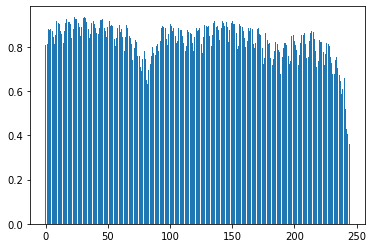

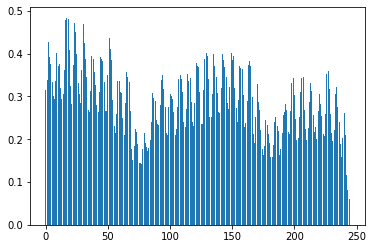

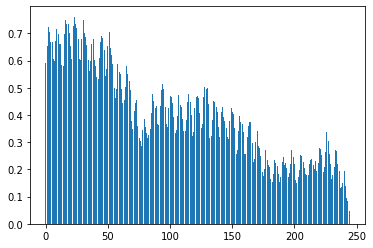

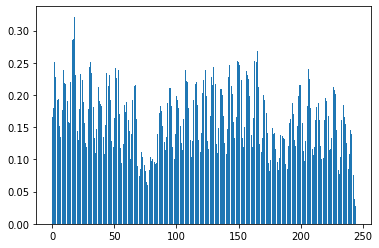

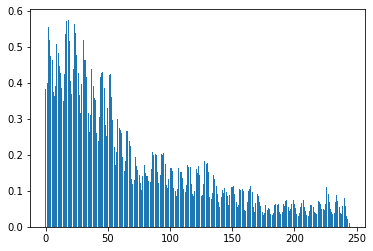

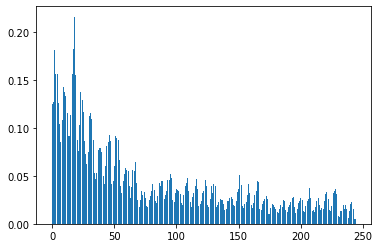

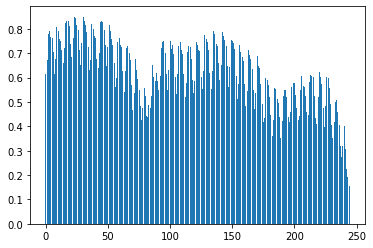

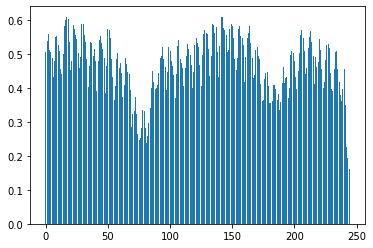

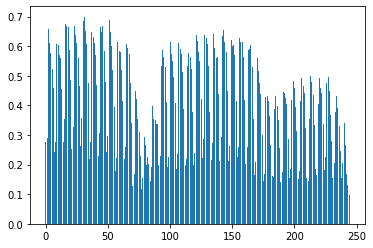

In [177]:
for i in range(9):
    idx = np.where(kmeans.labels_==i)
    plt.bar(np.arange(0, 245), binary_activity_X[idx].mean(0))
    plt.show()

Vrsta istrazivanja prema svrsi: Primijenjeno istraživanje
Cilj rada je stvaranje praktičnog znanstvenog znanja o uspješnosti studenata

Vrsta istraživanja prema dubini: Objašnjavačko istraživanje
Otkriva se uzročno-posljedična veza između aktivnosti i atributa studenata i njihove uspješnosti na predmetima

Prema vrsti korištenih podataka: kvantitativno
Koriste se mjerljive varijable poput klikova u danu kako bih se objasnila uspješnost studenta


Prema stupnju manipulacije varijablama: Promatračko istraživanje
Analizira se usjpešnost studenata u prirodnom kontekstu tako što se prati njihova aktivnost u virtualnom ukruženju

Prema vrsti zaključka: Deduktivno istraživanje
Pokušava se zakljućit koja varijabla predviđa uspješnost studenta

Prema vremenu provedbe: Studija presjeka

Prema izvoru informacija: Primarno istraživanje

Prema načinu prikupljanja podataka: Terensko istraživanje
Podaci se prikupljaju iz virtualnog okruženja za učenje

In [ ]:
Metode kako su podaci za članak prikupljeni
Opservacijsko istraživanje
    sistemsko promatranje : promatra se što studenti rade u virtualnom okruženju

In [ ]:
Podaci su prikupljeni i objavljeni prema pravilima istraživačke etike